In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
!pip install pandas

In [10]:
# -----------------------------------------------
# Convert CSV file encoding to UTF-8 (Run once)
# -----------------------------------------------
import os
import pandas as pd

# Adjust these paths as needed
old_path = r"C:\Windows\System32\MiniProject\Superstore.csv"   # Current file location
new_path = r"C:\MiniProject\Superstore_utf8.csv"               # New UTF-8 version

# Check if file exists before reading
if not os.path.exists(old_path):
    raise FileNotFoundError(f"❌ Source file not found: {old_path}")
else:
    print(f"✅ Found file at: {old_path}")

# Read using Windows encoding (cp1252 works for Excel/ANSI files)
df = pd.read_csv(old_path, encoding="cp1252")

# Save a UTF-8 encoded version
os.makedirs(os.path.dirname(new_path), exist_ok=True)
df.to_csv(new_path, index=False, encoding="utf-8")

print(f"✅ File converted successfully!")
print(f"📂 Saved at: {new_path}")


✅ Found file at: C:\Windows\System32\MiniProject\Superstore.csv
✅ File converted successfully!
📂 Saved at: C:\MiniProject\Superstore_utf8.csv


✅ File found: C:\Windows\System32\MiniProject\Superstore_utf8.csv
✅ Data loaded successfully!

🔹 Schema:
root
 |-- Row ID: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- Discount: string (nullable = true)
 |-- Profit: double (nullable = true)


🔹 Sample Records:
+------+-------------

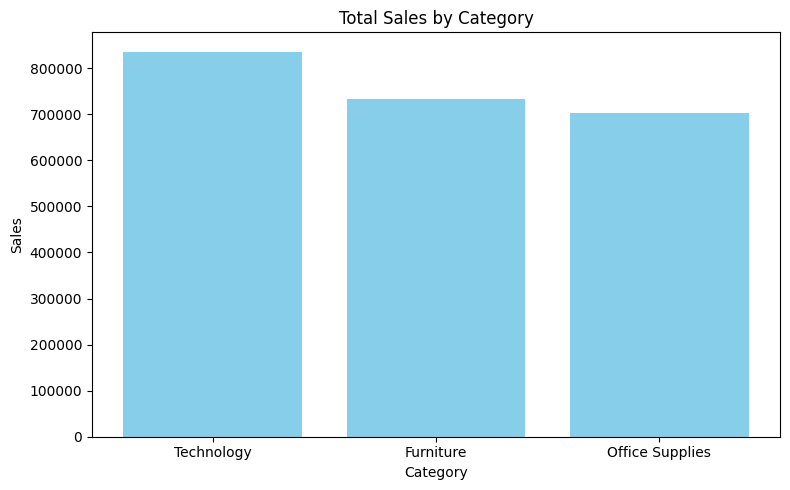

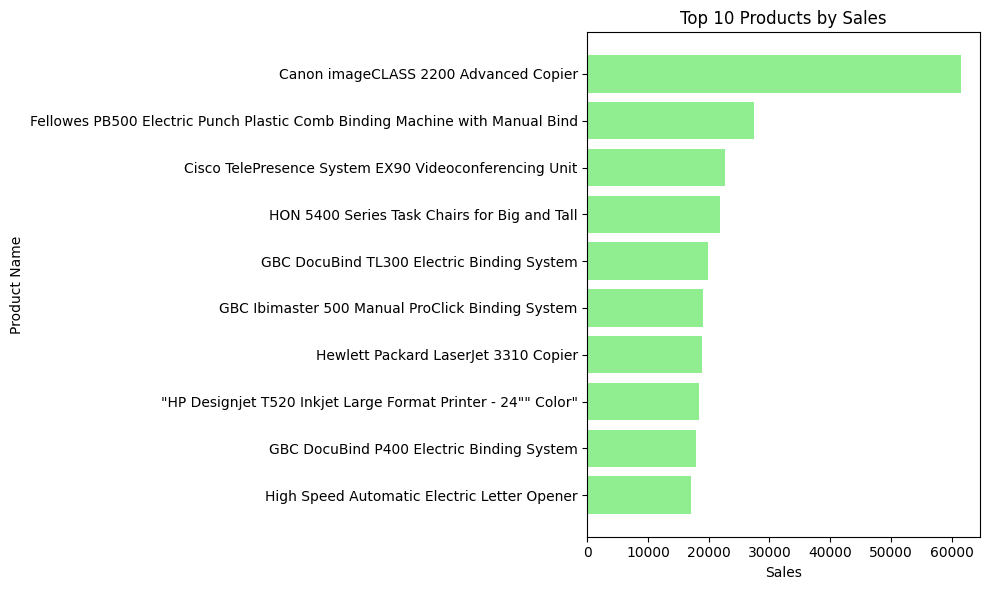

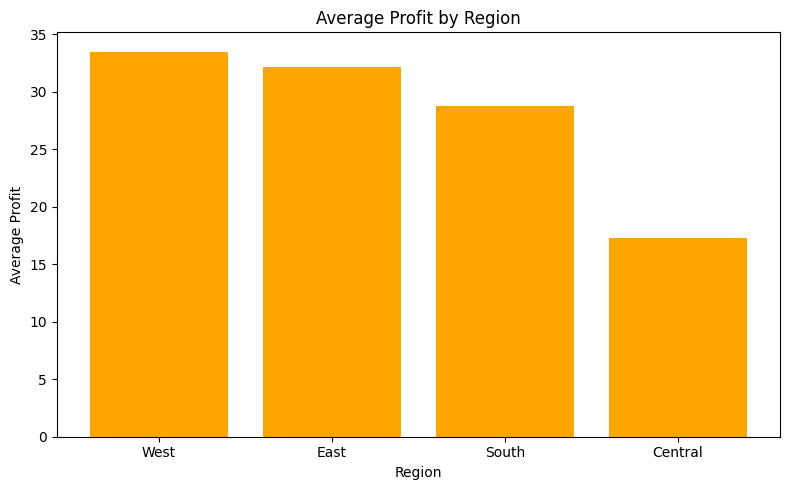

✅ CSV successfully saved to: C:\Users\anwar\Downloads\Processed_Superstore.csv


In [47]:
# ===============================================================
# 📊 Superstore Sales Analysis using PySpark
# ===============================================================
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum, avg, count, desc
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, regexp_replace, trim, when
from pyspark.sql.types import DoubleType


# ===============================================================
# 1️⃣ Spark Session Setup
# ===============================================================
spark = SparkSession.builder \
    .appName("Superstore Sales Analysis") \
    .getOrCreate()

# ===============================================================
# 2️⃣ Load Dataset (UTF-8 version)
# ===============================================================
file_path = r"C:\Windows\System32\MiniProject\Superstore_utf8.csv"    # Converted file

if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ File not found at: {file_path}")
else:
    print(f"✅ File found: {file_path}")

df = spark.read.option("header", True).option("inferSchema", True).csv(f"file:///{file_path}")
print("✅ Data loaded successfully!")

# ===============================================================
# 3️⃣ Initial Data Exploration
# ===============================================================
print("\n🔹 Schema:")
df.printSchema()

print("\n🔹 Sample Records:")
df.show(5)

print(f"Total Rows: {df.count()}")

# ===============================================================
# 4️⃣ Data Cleaning
# ===============================================================
# Remove nulls and duplicates
df_clean = df.dropna().dropDuplicates()

# Optional: trim whitespace in string columns
for col_name, dtype in df_clean.dtypes:
    if dtype == "string":
        df_clean = df_clean.withColumn(col_name, col(col_name).alias(col_name))

print(f"✅ Cleaned Data Count: {df_clean.count()}")

# ===============================================================
# 5️⃣ Sales Analysis
# ===============================================================

from pyspark.sql.functions import col, sum as _sum, avg, desc, expr

# --- Total Sales by Category ---
sales_by_category = df.withColumn("Sales_double", expr("try_cast(Sales as double)")) \
    .groupBy("Category") \
    .agg(_sum("Sales_double").alias("Total_Sales")) \
    .orderBy(desc("Total_Sales"))

print("🔹 Total Sales by Category:")
sales_by_category.show()


# --- Top 10 Products by Sales ---
top_products = df.withColumn("Sales_double", expr("try_cast(Sales as double)")) \
    .groupBy("Product Name") \
    .agg(_sum("Sales_double").alias("Total_Sales")) \
    .orderBy(desc("Total_Sales")) \
    .limit(10)

print("\n🔹 Top 10 Products by Sales:")
top_products.show()


# --- Average Profit by Region ---
profit_by_region = df.withColumn("Profit_double", expr("try_cast(Profit as double)")) \
    .groupBy("Region") \
    .agg(avg("Profit_double").alias("Avg_Profit")) \
    .orderBy(desc("Avg_Profit"))

print("\n🔹 Average Profit by Region:")
profit_by_region.show()


# ===============================================================
# 6️⃣ Convert to Pandas for Visualization
# ===============================================================
pdf_category = sales_by_category.toPandas()
pdf_products = top_products.toPandas()
pdf_profit_region = profit_by_region.toPandas()

# ===============================================================
# 7️⃣ Visualizations (Matplotlib)
# ===============================================================
plt.figure(figsize=(8, 5))
plt.bar(pdf_category["Category"], pdf_category["Total_Sales"], color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(pdf_products["Product Name"], pdf_products["Total_Sales"], color='lightgreen')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(pdf_profit_region["Region"], pdf_profit_region["Avg_Profit"], color='orange')
plt.title("Average Profit by Region")
plt.xlabel("Region")
plt.ylabel("Average Profit")
plt.tight_layout()
plt.show()

# ===============================================================
# 8️⃣ Save Processed Data
# ===============================================================
# ===============================================================
# 8️⃣ Save Processed Data (Simplified)
# ===============================================================
# Convert Spark DataFrame to Pandas
df_pandas = df_clean.toPandas()

# Path to save CSV in Downloads
downloads_path = r"C:\Users\anwar\Downloads\Processed_Superstore.csv"

# Save as CSV (overwrite if exists)
df_pandas.to_csv(downloads_path, index=False)

print(f"✅ CSV successfully saved to: {downloads_path}")




# Stop Spark Session
spark.stop()
